In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#plt.style.use('seaborn-white')
#plt.style.use('fivethirtyeight')
import matplotlib as mpl
import datetime as dt
import seaborn as sns


plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 22})

plt.style.use('seaborn-poster')

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
#mpl.rcParams['axes.labelcolor'] = "fd7400"
#mpl.rcParams['text.color'] = "#004358"#"fd7400" #"#bbbbbb" #''
#mpl.rcParams['lines.markeredgecolor'] = "fd7400"
#mpl.rcParams['xtick.color'] = "bedb39"
#mpl.rcParams['ytick.color'] = "bedb39"
#mpl.rcParams['xtick.labelcolor'] = "bedb39"
#mpl.rcParams['axes.facecolor'] = "white"
#mpl.rcParams['axes.edgecolor'] = "black"
#mpl.rcParams['lines.color'] = "red"
color_standard = '#004358'

# ADP

In [6]:
url = 'https://adpemploymentreport.com/2022/January/NER/docs/ADP_NER_History_2022_01.xlsx'
adp_industry = pd.read_excel(url, header=2, usecols= [0, *range(11, 26)], skipfooter=6 )
adp_industry.Month = [pd.to_datetime(str(x).replace('M','-')+'-01') for x in adp_industry.Month]
adp_industry.set_index('Month', inplace=True)
adp_industry.rename(columns={'Prof.l/business services':'Biz services','Natural resources & mining':'Mining', 
                             'Professional services':'Prof. services','Management of companies':'Management', 
                             'Administrative & support services':'Administrative','Trade/transp./utilities':'Transportation',
                             'Education & health services':'Education & health'
                            },inplace=True)
adp_industry.tail(3)

,Construction,Mining,Manufacturing,Biz services,Prof. services,Management,Administrative,Education & health,Healthcare,Education,Leisure & hospitality,Transportation,Information,Financial activities,Other services
Month,,,,,,,,,,,,,,,
2021-11-01,7654.952317,710.039559,12506.810872,20871.378493,9658.736556,2351.547193,8861.094745,24140.261592,20442.600257,3697.661335,14835.503387,27108.509940,2580.988006,8774.398004,5658.044356
2021-12-01,7714.894872,712.131251,12575.690333,20991.824236,9705.922664,2358.010612,8927.890959,24221.460776,20514.456705,3707.004071,15074.928127,27243.208658,2592.204499,8797.324735,5693.116411
2022-01-01,7704.809565,716.371309,12554.766160,20988.408784,9710.321797,2356.426177,8921.660810,24206.771259,20504.398371,3702.372888,14921.385316,27181.592951,2583.925981,8788.095417,5669.690213


In [7]:
adp_industry.columns

Index(['Construction', 'Mining', 'Manufacturing', 'Biz services',
       'Prof. services', 'Management', 'Administrative', 'Education & health',
       'Healthcare', 'Education', 'Leisure & hospitality', 'Transportation',
       'Information', 'Financial activities', 'Other services'],
      dtype='object')

In [8]:
first = adp_industry['2020-02-01':].iloc[0]

last = adp_industry['2020-02-01':].iloc[-1]

change_jobs = (last-first)/1000
change_jobs.drop(['Management','Mining','Prof. services',
                  'Construction','Financial activities',
                 'Education'],axis=0, inplace=True)
change_jobs

Manufacturing           -0.230183
Biz services            -0.559476
Administrative          -0.554055
Education & health      -0.318414
Healthcare              -0.221350
Leisure & hospitality   -1.886679
Transportation          -0.684706
Information             -0.255034
Other services          -0.246447
dtype: float64

Text(0, 0.5, 'Change in jobs since February 2020, Millions')

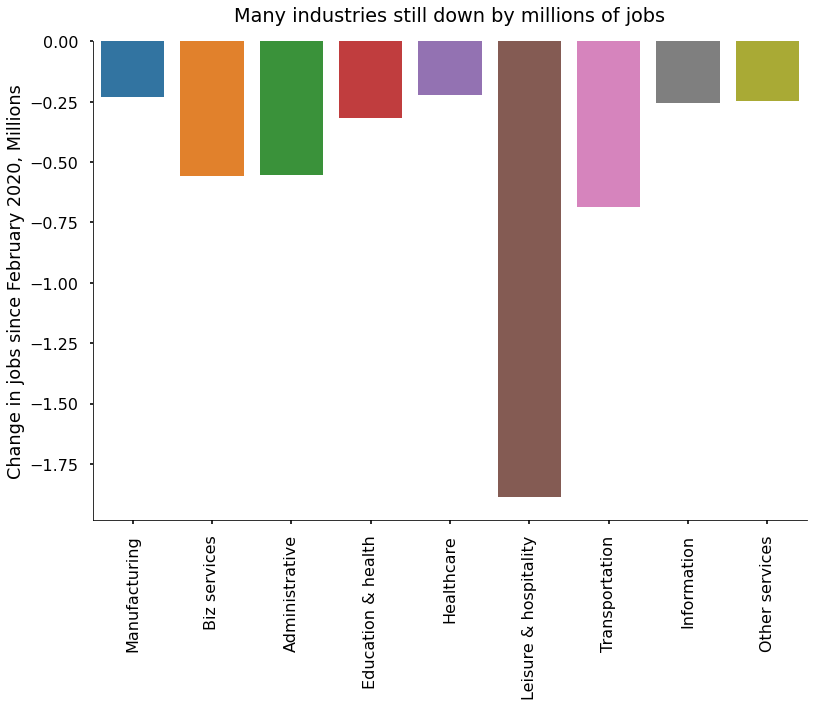

In [9]:
sns.barplot(x = change_jobs.index, y = change_jobs.values)
plt.xticks(rotation = 90) 
plt.title('Many industries still down by millions of jobs',pad=20)
plt.ylabel('Change in jobs since February 2020, Millions')


## 2. Graph 2

In [11]:
url = 'https://adpemploymentreport.com/2022/January/NER/docs/ADP_NER_History_2022_01.xlsx'
adp_total = pd.read_excel(url, header=2, usecols=[0,1,2,3], skipfooter=6)
adp_total.Month = [pd.to_datetime(str(x).replace('M','-')+'-01') for x in adp_total.Month]
adp_total.set_index('Month', inplace=True)
adp_total.tail(3)

,Total private,Goods producing,Service providing
Month,,,
2021-11-01,124840.886526,20871.802748,103969.083778
2021-12-01,125616.783899,21002.716457,104614.067443
2022-01-01,125315.816955,20975.947034,104339.869921


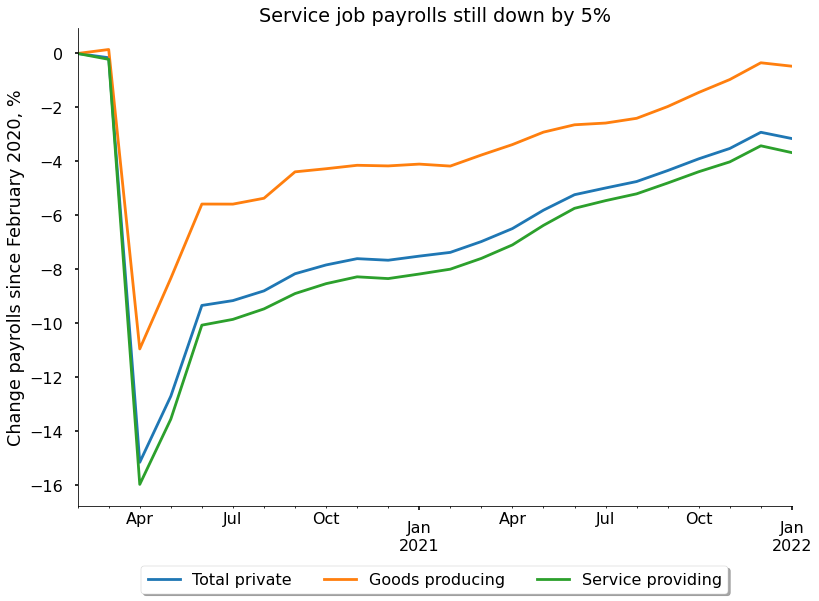

In [12]:
adp_total['2020-02-01':].transform(lambda x: (x-x.iloc[0])/(x.iloc[0])*100).plot()
plt.ylabel('Change payrolls since February 2020, %')
plt.title('Service job payrolls still down by 5%')
plt.xlabel('')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3, shadow=True, fancybox=True)
